# Standalone mode demo: Paralell characterization of eight bandpass filters

In this demo eight Agilent DSOX2002A oscilloscope are going to be controlled using instin to measure the gain and phase dependencies with the frequency, and then the filter parameters will be fitted.

The filters to be characterized are Sallen-Key Butterworth bandpass filters. Four of them have been designed to have a central frequency of 2kHz and Q=5 (R1=36k, R2=10k, R3=8.2k, R4=390, R5=1k, C1=C2=10n). The four remaining have f0=20kHz and Q=5 (same values for the resistors, C1=C2=1n). The operational amplifier used is the uA741.
![BP filters topology](filter.png)

The transfer function modeling this filter is:

$H(s) = \frac{A_0 \frac{\omega_0}{Q}s}{s^2+\frac{\omega_0}{Q}s+\omega_0^2}$

Where $\omega_0 = 2\pi f_0$

Each gateway is controlling two oscilloscopes, one with f0=2kHz and the other with f0=20kHz, thus four gateways are needed.

![A gateways setup](setup.jpg)

The proposed standalone operation mode is designed to allow parralell characterizations among other purposes. When testing this feture, the four gateways where controlled using four Windows CMDs, but in this notebook demo the paralelization can not be shown as one cell is run after each other. Maybe the IPython paralleization feature could solve this.

In [10]:
import instin
import time
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.optimize import curve_fit
from scipy import signal
from os import mkdir, replace

In [8]:
for i in range(4):
    try:
        mkdir('GW{}'.format(i+1))
    except FileExistsError:
        pass

## First gateway

The IP and port are needed to communicate with the gateway.


In [4]:
IP = '192.168.1.11'
port = 50001

The `sincro` function serves as an starting command, as well it sets the time at the gateway.

In [10]:
print('PC: ' + time.ctime(time.time()))
instin.sincro(IP, port)

PC: Wed Jan 20 17:16:27 2021


The `send_program` function of `instin` allows to send an entire program to be run on the gateway, in this case `filter-characterization-local.py`. Additionally, the names of the output files generated with the results of the input program must be passed.

As we want to measure the time duration of this function, the `time.time()` function is used.

> `send_program` has a lot of verbosity. Maybe it is not necessary and it could be changed in the future.

In [11]:
t0 = time.time()
instin.send_program(IP, port, 'filter-characterization-local.py', 'data_BP_osc0.txt', 'data_BP_osc1.txt')
time.time()-t0

Socket created
Abriendo /home/pi/Desktop/puesto.py
Archivos de salida 2
Archivo de salida 0:/home/pi/Desktop/data_BP_osc0.txt
Archivo de salida 1:/home/pi/Desktop/data_BP_osc1.txt
4096
El tamano del programa de entrada es 4096
b'import visa\nimport time\nimport numpy as np\n\nN=100 # Number of frequencies to evaluate\nVISA = [\'USB0::0x0957::0x179B::MY51250764::INSTR\', \'USB0::0x0957::0x179B::MY51136512::INSTR\']\n\nresources=visa.ResourceManager(\'@py\')\n\nN_instr = len(VISA)\n\nfreq = np.empty((2,N))\n\nfreq[0,:]=np.logspace(np.log10(15000),np.log10(25000),N)\nfreq[1,:]=np.logspace(np.log10(1500),np.log10(2500),N)\n\nmedida_i=np.zeros((N_instr,N))\nmedida_o=np.zeros((N_instr,N))\nfase=np.zeros((N_instr,N))\n\ninstrumento=[]\nfor j in range(N_instr): instrumento.append(resources.open_resource(VISA[j]))\n\n# inst.timeout=50 # parece que 50 es el tiempo minimo\nprint(\'Configurando salida del generador de ondas y encendiendo canales\')\nfor j in range(N_instr): instrumento[j].write(\'

257.41891503334045

The `data_BP_osc0.txt` file contains the gain and phase frequency responses for the 20kHz BP filter. We do a preliminary plot to check everything is okey.

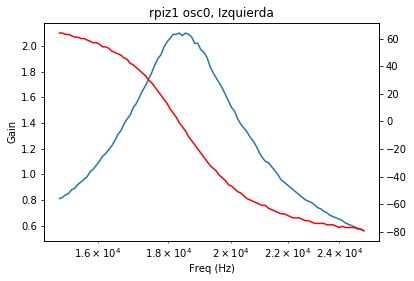

In [22]:
f, in_V, out_V, phase = np.loadtxt('data_BP_osc0.txt',skiprows=3,usecols=(0,1,2,3),unpack=True)
fig, ax1 = plt.subplots()
ax1.semilogx(f, (out_V/in_V))
ax2 = ax1.twinx()
ax2.semilogx(f,phase,color='red')
ax1.set_title('GW1 osc0, $f_0=20kHz$')
ax1.set_xlabel('Freq (Hz)')
ax2.set_xlabel('Phase (deg)')
ax1.set_ylabel('Gain');
plt.savefig('GW1/osc0.png')
replace('data_BP_osc0.txt','GW1/data_BP_osc0.txt')

In the case of `data_BP_osc1.txt` the filter has f0=2kHz

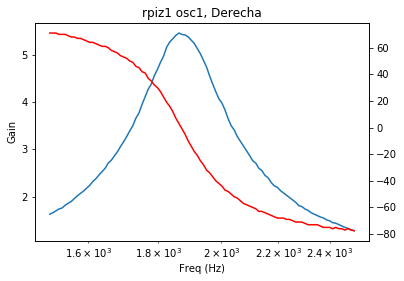

In [23]:
f, in_V, out_V, fase = np.loadtxt('data_BP_osc1.txt',skiprows=3,usecols=(0,1,2,3),unpack=True)
fig, ax1 = plt.subplots()
ax1.semilogx(f, (out_V/in_V))
ax2 = ax1.twinx()
ax2.semilogx(f,fase,color='red')
ax1.set_title('GW1 osc1, $f_0=2kHz$')
ax1.set_xlabel('Freq (Hz)')
ax2.set_xlabel('Phase (deg)')
ax1.set_ylabel('Gain');
plt.savefig('GW1/osc1.png')
replace('data_BP_osc1.txt','GW1/data_BP_osc1.txt')

## Second gateway

The same is done in the following gateways.

In [16]:
IP = '192.168.1.12'
port = 50002

In [18]:
print('PC: ' + time.ctime(time.time()))
instin.sincro(IP, port)

PC: Wed Jan 20 17:26:02 2021


In [19]:
t0 = time.time()
instin.send_program(IP, port, 'filter-characterization-local.py.py', 'data_BP_osc0.txt', 'data_BP_osc1.txt')
time.time()-t0

Socket created
Abriendo /home/pi/Desktop/puesto.py
Archivos de salida 2
Archivo de salida 0:/home/pi/Desktop/data_BP_osc0.txt
Archivo de salida 1:/home/pi/Desktop/data_BP_osc1.txt
4096
El tamano del programa de entrada es 4096
b'import visa\nimport time\nimport numpy as np\n\nN=100 # Number of frequencies to evaluate\nVISA = [\'USB0::0x0957::0x179B::MY51250764::INSTR\', \'USB0::0x0957::0x179B::MY51136512::INSTR\']\n\nresources=visa.ResourceManager(\'@py\')\n\nN_instr = len(VISA)\n\nfreq = np.empty((2,N))\n\nfreq[0,:]=np.logspace(np.log10(15000),np.log10(25000),N)\nfreq[1,:]=np.logspace(np.log10(1500),np.log10(2500),N)\n\nmedida_i=np.zeros((N_instr,N))\nmedida_o=np.zeros((N_instr,N))\nfase=np.zeros((N_instr,N))\n\ninstrumento=[]\nfor j in range(N_instr): instrumento.append(resources.open_resource(VISA[j]))\n\n# inst.timeout=50 # parece que 50 es el tiempo minimo\nprint(\'Configurando salida del generador de ondas y encendiendo canales\')\nfor j in range(N_instr): instrumento[j].write(\'

266.1183967590332

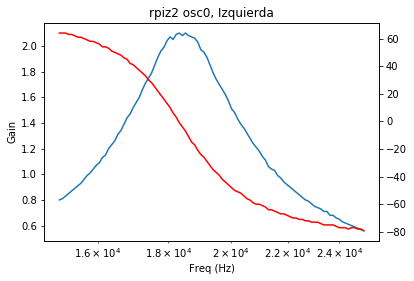

In [20]:
f, in_V, out_V, phase = np.loadtxt('data_BP_osc0.txt',skiprows=3,usecols=(0,1,2,3),unpack=True)
fig, ax1 = plt.subplots()
ax1.semilogx(f, (out_V/in_V))
ax2 = ax1.twinx()
ax2.semilogx(f,phase,color='red')
ax1.set_title('GW2 osc0, $f_0=20kHz$')
ax1.set_xlabel('Freq (Hz)')
ax2.set_xlabel('Phase (deg)')
ax1.set_ylabel('Gain');
plt.savefig('GW2/osc0.png')
replace('data_BP_osc0.txt','GW2/data_BP_osc0.txt')

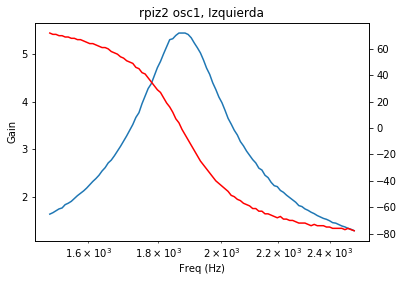

In [21]:
f, in_V, out_V, phase = np.loadtxt('data_BP_osc1.txt',skiprows=3,usecols=(0,1,2,3),unpack=True)
fig, ax1 = plt.subplots()
ax1.semilogx(f, (out_V/in_V))
ax2 = ax1.twinx()
ax2.semilogx(f,phase,color='red')
ax1.set_title('GW2 osc1, $f_0=2kHz$')
ax1.set_xlabel('Freq (Hz)')
ax2.set_xlabel('Phase (deg)')
ax1.set_ylabel('Gain');
plt.savefig('GW2/osc1.png')
replace('data_BP_osc1.txt','GW2/data_BP_osc1.txt')

## Third gateway

In [24]:
IP = '192.168.1.13'
port = 50003

In [29]:
print('PC: ' + time.ctime(time.time()))
instin.sincro(IP, port)

PC: Wed Jan 20 17:34:16 2021


In [30]:
t0 = time.time()
instin.send_program(IP, port, 'filter-characterization-local.py.py', 'data_BP_osc0.txt', 'data_BP_osc1.txt')
time.time()-t0

Socket created
Abriendo /home/pi/Desktop/puesto.py
Archivos de salida 2
Archivo de salida 0:/home/pi/Desktop/data_BP_osc0.txt
Archivo de salida 1:/home/pi/Desktop/data_BP_osc1.txt
4096
El tamano del programa de entrada es 4096
b'import visa\nimport time\nimport numpy as np\n\nN=100 # Number of frequencies to evaluate\nVISA = [\'USB0::0x0957::0x179B::MY51250764::INSTR\', \'USB0::0x0957::0x179B::MY51136512::INSTR\']\n\nresources=visa.ResourceManager(\'@py\')\n\nN_instr = len(VISA)\n\nfreq = np.empty((2,N))\n\nfreq[0,:]=np.logspace(np.log10(15000),np.log10(25000),N)\nfreq[1,:]=np.logspace(np.log10(1500),np.log10(2500),N)\n\nmedida_i=np.zeros((N_instr,N))\nmedida_o=np.zeros((N_instr,N))\nfase=np.zeros((N_instr,N))\n\ninstrumento=[]\nfor j in range(N_instr): instrumento.append(resources.open_resource(VISA[j]))\n\n# inst.timeout=50 # parece que 50 es el tiempo minimo\nprint(\'Configurando salida del generador de ondas y encendiendo canales\')\nfor j in range(N_instr): instrumento[j].write(\'

258.08901810646057

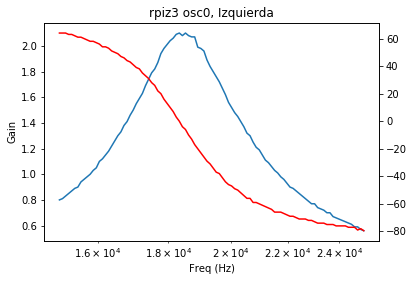

In [31]:
f, in_V, out_V, phase = np.loadtxt('data_BP_osc0.txt',skiprows=3,usecols=(0,1,2,3),unpack=True)
fig, ax1 = plt.subplots()
ax1.semilogx(f, (out_V/in_V))
ax2 = ax1.twinx()
ax2.semilogx(f,phase,color='red')
ax1.set_title('GW3 osc0, $f_0=20kHz$')
ax1.set_xlabel('Freq (Hz)')
ax2.set_xlabel('Phase (deg)')
ax1.set_ylabel('Gain');
plt.savefig('GW3/osc0.png')
replace('data_BP_osc0.txt','GW3/data_BP_osc0.txt')

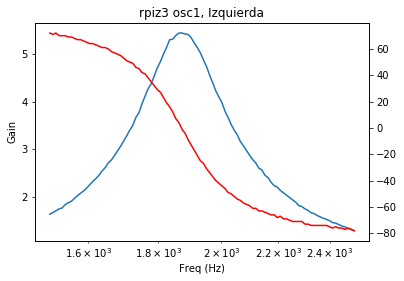

In [32]:
f, in_V, out_V, phase = np.loadtxt('data_BP_osc1.txt',skiprows=3,usecols=(0,1,2,3),unpack=True)
fig, ax1 = plt.subplots()
ax1.semilogx(f, (out_V/in_V))
ax2 = ax1.twinx()
ax2.semilogx(f,phase,color='red')
ax1.set_title('GW3 osc1, $f_0=2kHz$')
ax1.set_xlabel('Freq (Hz)')
ax2.set_xlabel('Phase (deg)')
ax1.set_ylabel('Gain');
plt.savefig('GW3/osc1.png')
replace('data_BP_osc1.txt','GW3/data_BP_osc1.txt')

## Fourth gateway

In [33]:
IP = '192.168.1.14'
port = 50004

In [34]:
print('PC: ' + time.ctime(time.time()))
instin.sincro(IP, port)

PC: Wed Jan 20 17:42:56 2021


In [35]:
t0 = time.time()
instin.send_program(IP, port, 'filter-characterization-local.py', 'data_BP_osc0.txt', 'data_BP_osc1.txt')
time.time()-t0

Socket created
Abriendo /home/pi/Desktop/puesto.py
Archivos de salida 2
Archivo de salida 0:/home/pi/Desktop/data_BP_osc0.txt
Archivo de salida 1:/home/pi/Desktop/data_BP_osc1.txt
4096
El tamano del programa de entrada es 4096
b'import visa\nimport time\nimport numpy as np\n\nN=100 # Number of frequencies to evaluate\nVISA = [\'USB0::0x0957::0x179B::MY51250764::INSTR\', \'USB0::0x0957::0x179B::MY51136512::INSTR\']\n\nresources=visa.ResourceManager(\'@py\')\n\nN_instr = len(VISA)\n\nfreq = np.empty((2,N))\n\nfreq[0,:]=np.logspace(np.log10(15000),np.log10(25000),N)\nfreq[1,:]=np.logspace(np.log10(1500),np.log10(2500),N)\n\nmedida_i=np.zeros((N_instr,N))\nmedida_o=np.zeros((N_instr,N))\nfase=np.zeros((N_instr,N))\n\ninstrumento=[]\nfor j in range(N_instr): instrumento.append(resources.open_resource(VISA[j]))\n\n# inst.timeout=50 # parece que 50 es el tiempo minimo\nprint(\'Configurando salida del generador de ondas y encendiendo canales\')\nfor j in range(N_instr): instrumento[j].write(\'

255.79961013793945

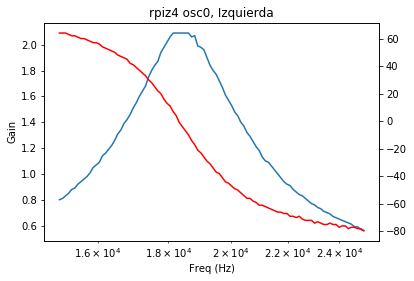

In [36]:
f, in_V, out_V, phase = np.loadtxt('data_BP_osc0.txt',skiprows=3,usecols=(0,1,2,3),unpack=True)
fig, ax1 = plt.subplots()
ax1.semilogx(f, (out_V/in_V))
ax2 = ax1.twinx()
ax2.semilogx(f,phase,color='red')
ax1.set_title('GW4 osc0, $f_0=20kHz$')
ax1.set_xlabel('Freq (Hz)')
ax2.set_xlabel('Phase (deg)')
ax1.set_ylabel('Gain');
plt.savefig('GW4/osc0.png')
replace('data_BP_osc0.txt','GW4/data_BP_osc0.txt')

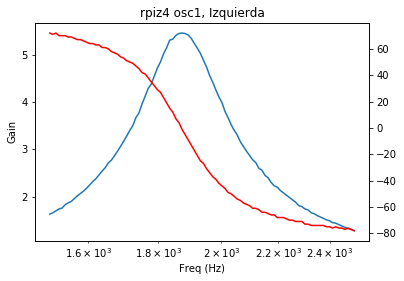

In [37]:
f, in_V, out_V, phase = np.loadtxt('data_BP_osc1.txt',skiprows=3,usecols=(0,1,2,3),unpack=True)
fig, ax1 = plt.subplots()
ax1.semilogx(f, (out_V/in_V))
ax2 = ax1.twinx()
ax2.semilogx(f,phase,color='red')
ax1.set_title('GW4 osc1, $f_0=2kHz$')
ax1.set_xlabel('Freq (Hz)')
ax2.set_xlabel('Phase (deg)')
ax1.set_ylabel('Gain');
plt.savefig('GW4/osc1.png')
replace('data_BP_osc1.txt','GW4/data_BP_osc1.txt')

## Filter modeling: parameters fitting

Once all the filters has been acquired, we are using the `curve_fit` function of `scipy` to fit the gain and phase curves to the filter model and obtain its parameters $A_0$, $f_0$ and $Q$. The `signal.freqs` function of `scipy` helps to define a trnasfer function.

In [16]:
def BPfilter_gain(w, A0, w0, Q):
    _, h = signal.freqs([A0*w0/Q, 0],[1, w0/Q, w0*w0],worN=w)
    return np.abs(h)

Now some helper variables are defined. `InitialGuess` are the inital parameters we are passing to `curve_fit`, whose values are the chossed we designing the filter.

In [17]:
f0_teo = ['20k', '2k']
f0_teo_f = [2e4, 2e3]
InitialGuess = [[4, 2*20000*np.pi, 5], [4, 2*2000*np.pi, 5]]

Now each filter is fitted.

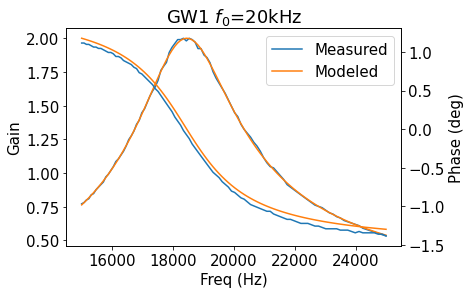

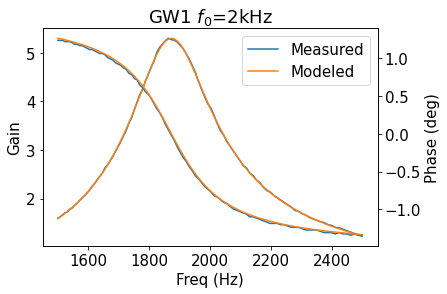

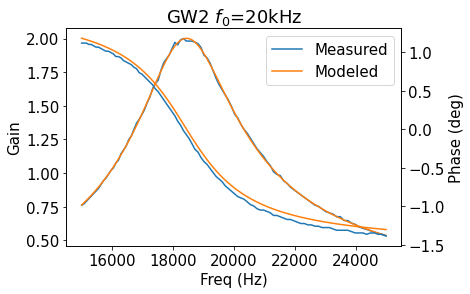

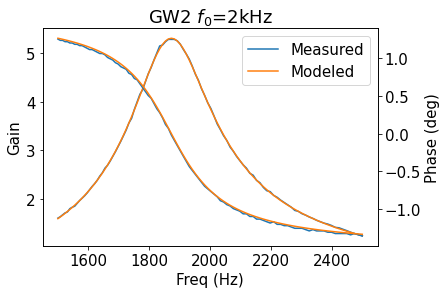

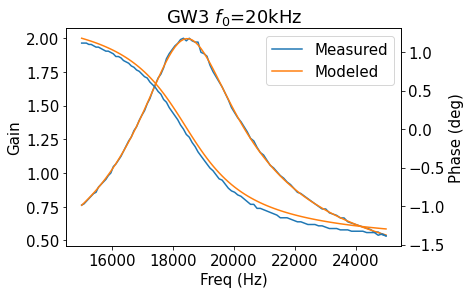

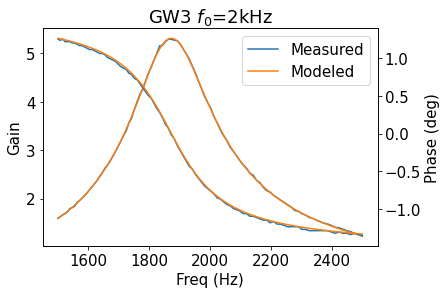

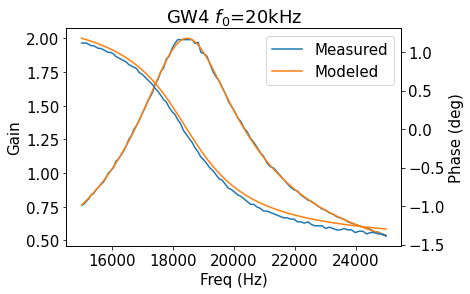

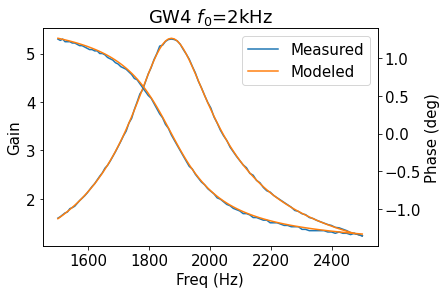

In [48]:
A0, w0, Q = np.zeros((4,2)), np.zeros((4,2)), np.zeros((4,2))

for i in range(4):
    for j in range(2):

        f, in_V, out_V, fase = np.loadtxt('./GW{}/data_BP_osc{}.txt'.format(i+1,j), skiprows=3, usecols=(0,1,2,3), unpack=True)

        gain = (out_V/in_V)
        phase = 2*np.pi*fase/360
        w = 2*np.pi*f

        gain_fit, _ = curve_fit(BPfilter_gain, w, gain, InitialGuess[j])

        A0[i,j], w0[i,j], Q[i,j] = gain_fit
        
        fig, ax1 = plt.subplots()
        ax1.plot(f, gain, label='Measured')
        ax1.plot(f, BPfilter_gain(w, A0[i,j], w0[i,j], Q[i,j]), label='Modeled')
        ax2 = ax1.twinx()
        ax2.plot(f, phase)
        ax2.plot(f, BPfilter_phase(w, A0[i,j], w0[i,j], Q[i,j]))
        ax1.set_title('GW{} $f_0$={}Hz'.format(i+1, f0_teo[j]))
        ax1.set_xlabel('Freq (Hz)')
        ax1.set_ylabel('Gain')
        ax2.set_ylabel('Phase (deg)')
        ax1.legend()

        fig.savefig('./GW{}/model-osc{}.png'.format(i+1,j), dpi=600)

In [20]:
np.savez('filter-params.npz', A0=A0, w0=w0, Q=Q)

This are the parameters fitted values and their average:

In [44]:
print(A0[:,0],'\nf0=20kHz: A0 = {} ± {}'.format(A0[:,0].mean(), A0[:,0].std()/np.sqrt(4)))

[2.00059133 2.00211811 1.99723225 2.00098757] 
f0=20kHz: A0 = 2.0002323133404207 ± 0.000910215830226094


In [43]:
print((w0/(2*np.pi))[:,0],'\nf0=20kHz: f0 = {} ± {}'.format((w0/(2*np.pi))[:,0].mean(), (w0/(2*np.pi))[:,0].std()/np.sqrt(4)))

[18452.998517   18448.34852498 18469.14485437 18458.46194705] 
f0=20kHz: f0 = 18457.23846085308 ± 3.8751387781375954


In [42]:
print(Q[:,0],'\nf0=20kHz: Q = {} ± {}'.format(Q[:,0].mean(), Q[:,0].std()/np.sqrt(4)))

[5.80230265 5.82139965 5.79016556 5.79894636] 
f0=20kHz: Q = 5.80320355317974 ± 0.005701000195740774


In [41]:
print(A0[:,1],'\nf0=2kHz: A0 = {} ± {}'.format(A0[:,1].mean(), A0[:,1].std()/np.sqrt(4)))

[5.29930391 5.31483624 5.31186423 5.3179559 ] 
f0=2kHz: A0 = 5.31099007080447 ± 0.003541242197323699


In [40]:
print((w0/(2*np.pi))[:,1],'\nf0=2kHz: f0 = {} ± {}'.format((w0/(2*np.pi))[:,1].mean(), (w0/(2*np.pi))[:,1].std()/np.sqrt(4)))

[1872.80870308 1872.83488418 1872.83256676 1872.8850965 ] 
f0=2kHz: f0 = 1872.8403126306357 ± 0.013906438628469369


In [38]:
print(Q[:,1],'\nf0=2kHz: Q = {} ± {}'.format(Q[:,1].mean(), Q[:,1].std()/np.sqrt(4)))

[7.12172773 7.13612879 7.13297016 7.14333403] 
f0=2kHz: Q = 7.133540177859446 ± 0.003892938443514905


Finally a fancy figure is ploted with all the filters and thier models

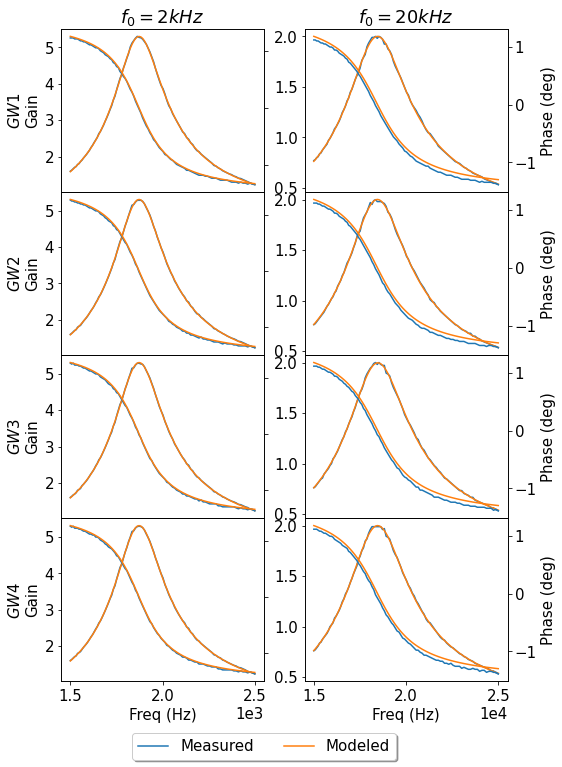

In [47]:
plt.rcParams.update({'font.size': 15})

fig_gnal, axs = plt.subplots(4,2, figsize=(8,12), sharex='col', gridspec_kw={'hspace': 0})

for i in range(4):
    for j in range(2):

        f, in_V, out_V, fase = np.loadtxt('./GW{}/data_BP_osc{}.txt'.format(i+1,j), skiprows=3, usecols=(0,1,2,3), unpack=True)

        gain = (out_V/in_V)
        phase = 2*np.pi*fase/360
        w = 2*np.pi*f

        ax1 = axs[i,j-1]
        ax1.plot(f, gain, label='Measured')
        ax1.plot(f, BPfilter_gain(w, A0[i,j], w0[i,j], Q[i,j]), label='Modeled')
        ax1.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        ax2 = ax1.twinx()
        ax2.plot(f, phase)
        ax2.plot(f, BPfilter_phase(w, A0[i,j], w0[i,j], Q[i,j]))
        if i==0: ax1.set_title(r'$\it{f_0='+str(f0_teo[j])+'Hz}$')
        if i==3:
            ax1.set_xlabel('Freq (Hz)')
        if j==1:
            ax1.set_ylabel(r"$\it{GW"+str(i+1)+"}$\nGain")
            ax2.set_yticklabels([])
        else: ax2.set_ylabel('Phase (deg)')
        if i==3 and j==1:
            box = ax1.get_position()
            #ax1.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
            ax1.legend(loc='upper center', bbox_to_anchor=(1, -0.27),
          fancybox=True, shadow=True, ncol=2)

fig_gnal.savefig('./model-osc.png', dpi=600)